# Car Insurance Data
**About Dataset**
Context
The company has shared its annual car insurance data. Now, you have to find out the real customer behaviors over the data.

**Content**
The columns are resembling practical world features.
The outcome column indicates 1 if a customer has claimed his/her loan else 0.
The data has 19 features from there 18 of them are corresponding logs which were taken by the company.

**Acknowledgements**
Mostly the data is real and some part of it is also generated by me.

**Inspiration**
The data is so well balanced that it will help kagglers find a better intuition of real customers and find the deepest story lien within it.

# 1) Importing Packages & Import Data

In [1]:
# data analysis
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# machine learning only sklearn for this rule
import sklearn.linear_model as lm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, auc, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.svm import SVC
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import RidgeClassifier, SGDClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# mount to Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Read CSV file into DataFrame
# df = pd.read_csv(r'../input/car-insurance-data/Car_Insurance_Claim.csv')
df = pd.read_csv("/content/drive/MyDrive/7202 Deep Learning/group work/Car_Insurance_Claim.csv")
df.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

In [8]:
# check null value
df.isna().sum()

ID                       0
AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           982
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         957
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
LOAN                     0
dtype: int64

In [9]:
# Rename 'OUTCOME'to LOAN'
df.rename(columns={"OUTCOME":"LOAN"}, inplace=True)

SyntaxError: ignored

# 2) EDA

In [10]:
df.describe()

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,LOAN
count,10000.000000,9018.000000,10000.000000,10000.000000,10000.000000,10000.000000,9043.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,500521.906800,0.515813,0.697000,0.498200,0.688800,19864.548400,11697.003207,1.482900,0.23920,1.056300,0.313300
std,290030.768758,0.137688,0.459578,0.500022,0.463008,18915.613855,2818.434528,2.241966,0.55499,1.652454,0.463858
min,101.000000,0.053358,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.00000,0.000000,0.000000
25%,249638.500000,0.417191,0.000000,0.000000,0.000000,10238.000000,10000.000000,0.000000,0.00000,0.000000,0.000000
50%,501777.000000,0.525033,1.000000,0.000000,1.000000,10238.000000,12000.000000,0.000000,0.00000,0.000000,0.000000
75%,753974.500000,0.618312,1.000000,1.000000,1.000000,32765.000000,14000.000000,2.000000,0.00000,2.000000,1.000000
max,999976.000000,0.960819,1.000000,1.000000,1.000000,92101.000000,22000.000000,22.000000,6.00000,15.000000,1.000000


In [12]:
# fill null value ["CREDIT_SCORE","ANNUAL_MILEAGE"]
df["CREDIT_SCORE"].fillna(df["CREDIT_SCORE"].median(), inplace = True)
df["ANNUAL_MILEAGE"].fillna(df["ANNUAL_MILEAGE"].mean(), inplace = True)
# df.isna().sum()

In [13]:
# encoding
print('GENDER : ', df.GENDER.unique())
print('AGE :', df.AGE.unique())
print('RACE : ', df.RACE.unique())
print('DRIVING_EXPERIENCE :', df.DRIVING_EXPERIENCE.unique())
print('EDUCATION : ', df.EDUCATION.unique())
print('INCOME :', df.INCOME.unique())
print('VEHICLE_YEAR :', df.VEHICLE_YEAR.unique())
print('VEHICLE_TYPE :', df.VEHICLE_TYPE.unique())


GENDER :  ['female' 'male']
AGE : ['65+' '16-25' '26-39' '40-64']
RACE :  ['majority' 'minority']
DRIVING_EXPERIENCE : ['0-9y' '10-19y' '20-29y' '30y+']
EDUCATION :  ['high school' 'none' 'university']
INCOME : ['upper class' 'poverty' 'working class' 'middle class']
VEHICLE_YEAR : ['after 2015' 'before 2015']
VEHICLE_TYPE : ['sedan' 'sports car']


In [14]:
cath_feature = pd.DataFrame(df,columns = ['GENDER','AGE','RACE','DRIVING_EXPERIENCE','EDUCATION','INCOME','VEHICLE_YEAR','VEHICLE_TYPE'])
one_hot_data = pd.get_dummies(cath_feature)

drop_list = ['GENDER','AGE','RACE','DRIVING_EXPERIENCE','EDUCATION','INCOME','VEHICLE_YEAR','VEHICLE_TYPE']
df.drop(drop_list,axis=1,inplace=True)

df_new = pd.concat([df,one_hot_data],axis=1)
df_new.dtypes

ID                             int64
CREDIT_SCORE                 float64
VEHICLE_OWNERSHIP            float64
MARRIED                      float64
CHILDREN                     float64
POSTAL_CODE                    int64
ANNUAL_MILEAGE               float64
SPEEDING_VIOLATIONS            int64
DUIS                           int64
PAST_ACCIDENTS                 int64
LOAN                         float64
GENDER_female                  uint8
GENDER_male                    uint8
AGE_16-25                      uint8
AGE_26-39                      uint8
AGE_40-64                      uint8
AGE_65+                        uint8
RACE_majority                  uint8
RACE_minority                  uint8
DRIVING_EXPERIENCE_0-9y        uint8
DRIVING_EXPERIENCE_10-19y      uint8
DRIVING_EXPERIENCE_20-29y      uint8
DRIVING_EXPERIENCE_30y+        uint8
EDUCATION_high school          uint8
EDUCATION_none                 uint8
EDUCATION_university           uint8
INCOME_middle class            uint8
I

### 2.1) Data Exploration 

In [15]:
for x_col in df_new.columns:
    fig = px.histogram(df_new, x=x_col, color="LOAN",title="x_col")
    fig.show()

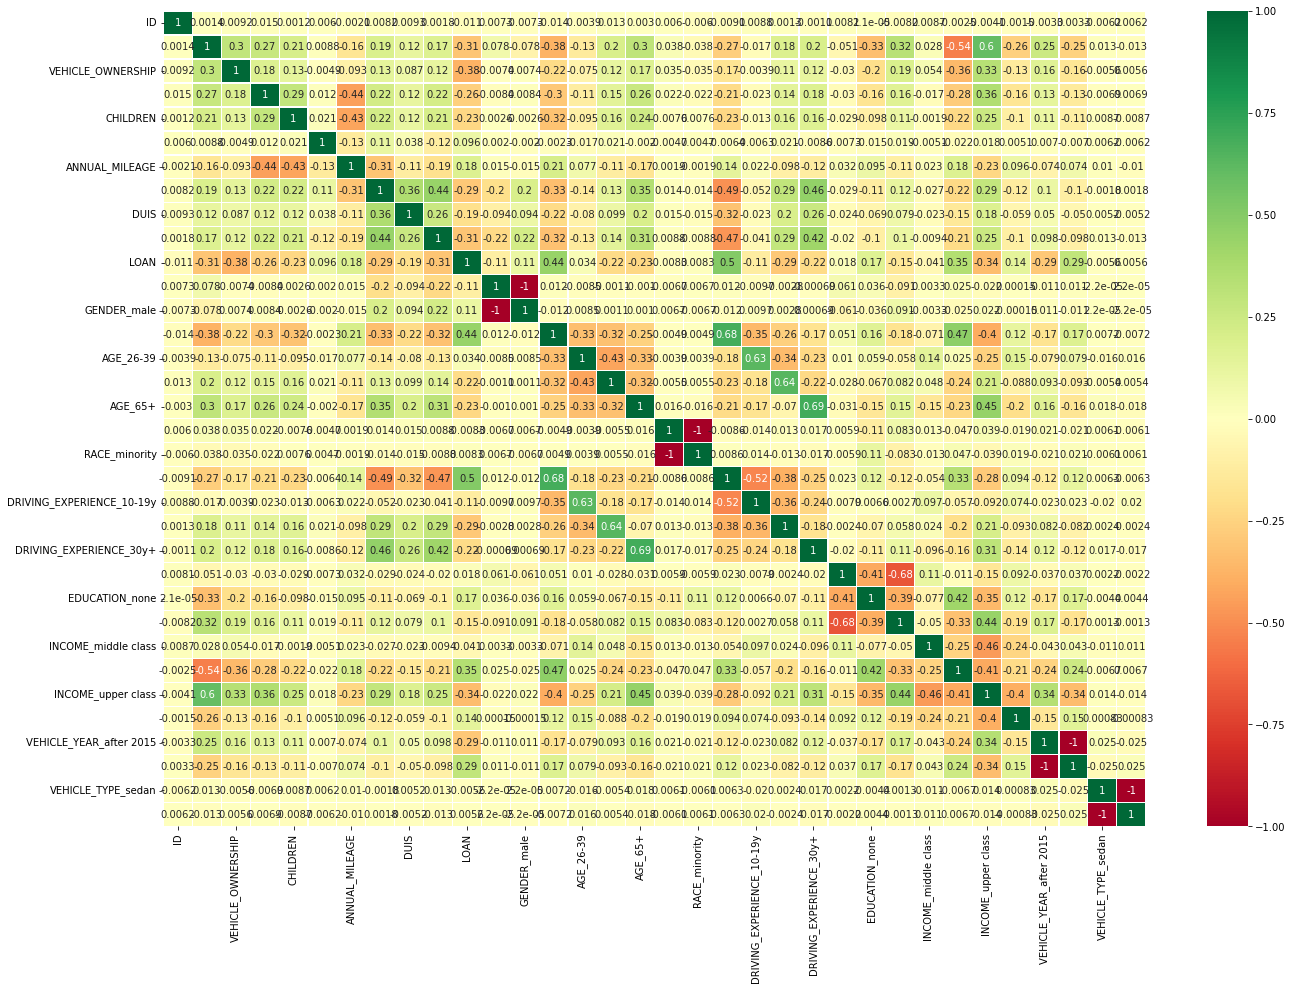

In [16]:
# correlation
sns.heatmap(df_new.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(22,15)
plt.show()

## 2.2) Handling Imbalance data

### Over- sampling

The simplest implementation of over-sampling is to duplicate random records from the minority class, which can cause overfishing.

In under-sampling, the simplest technique involves removing random records from the majority class, which can cause loss of information.

In [17]:
pos = df_new[df_new['LOAN']==1]
neg = df_new[df_new['LOAN']==0]
print(pos.shape)
print(neg.shape)

(3133, 34)
(6867, 34)


In [18]:
# Over-sampling
pos_rand = pos.sample(neg.shape[0],replace = True)  # duplicates randomly *exit.shape[0] - stay.shape[0]* samples
pos_rand.shape

(6867, 34)

In [19]:
# New dataset 
# df_new = pd.concat([neg_rand,pos],axis =0)
df_over = pd.concat([pos_rand,neg],axis =0)
df_over['LOAN'].value_counts()

1.0    6867
0.0    6867
Name: LOAN, dtype: int64

#3) Preprocessing

#### Splitting of the Data into separate training and validate set

In [20]:
X = df_over.drop(['LOAN','ID'], axis=1)
y = df_over['LOAN']

# #Split Train Test Data  train test valiation 70% 20% 10%
x_train, x_test, y_train, y_test = train_test_split(df_over, df_over[['LOAN']],train_size=0.8,stratify=df_over[['LOAN']],random_state=1)

x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train[['LOAN']],train_size=0.875,stratify=y_train[['LOAN']],random_state=1)


In [21]:
#Explore Train & Test

for x_col in x_train.columns:   
    fig = px.histogram(x_train, x=x_col, color="LOAN",title="Train")
    fig.show()
    fig = px.histogram(x_test, x=x_col, color="LOAN",title="Test")
    fig.show()
    fig = px.histogram(x_valid, x=x_col, color="LOAN",title="Validate")
    fig.show()

x_train=x_train.drop('LOAN',axis=1)
x_test=x_test.drop('LOAN',axis=1)
x_valid=x_valid.drop('LOAN',axis=1)

Output hidden; open in https://colab.research.google.com to view.

In [23]:
#Normalize data
scaler = StandardScaler()  
scaler.fit(x_train) 

x_train = scaler.transform(x_train) 
x_test = scaler.transform(x_test)
x_valid = scaler.transform(x_valid)

# 4) Machine learning
#### Model selection on scikit-learn

In [24]:
models = []
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('QDA', QuadraticDiscriminantAnalysis()))
models.append(('AdaBoost', AdaBoostClassifier()))
models.append(('Bagging', BaggingClassifier()))
models.append(('Extra Trees Ensemble', ExtraTreesClassifier(n_estimators=1000)))
models.append(('Gradient Boosting', GradientBoostingClassifier()))
models.append(('Random Forest', RandomForestClassifier(n_estimators=1000)))
models.append(('Ridge', RidgeClassifier()))
models.append(('SGD', SGDClassifier(tol=1e-3, max_iter=10000)))
models.append(('BNB', BernoulliNB()))
models.append(('GNB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('MLP', MLPClassifier()))
models.append(('LSVC', LinearSVC(max_iter=100000)))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('ETC', ExtraTreeClassifier()))

DECISION_FUNCTIONS = {"Ridge", "SGD", "LSVC", "SVC"}

In [25]:
import time
from sklearn.metrics import roc_auc_score, roc_curve
%matplotlib inline

best_model = None
best_model_name = ""
best_valid = 0
resultlist= pd.DataFrame([], columns=['model', 'runtime','Acc','repetition','type'])
for i in range(3):
  for name, model in models:
      start_time = time.time()
      model.fit(x_train, y_train)
      end_time = time.time()
      
      if name in DECISION_FUNCTIONS:
          proba = model.decision_function(x_test)
      else:
          proba = model.predict_proba(x_test)[:, 1]
      y_pred=model.predict(x_test)
      s=accuracy_score(y_test,y_pred) #f1_score(y_test, model.predict(x_test), average='weighted') 

      trainscore=accuracy_score(y_train,model.predict(x_train))
      
      #score =  roc_auc_score(y_train, proba)

      
      result = {'model': name, 'runtime': end_time - start_time, 'Acc': s,'repetition' : i,'type' :'ML'}
      resultlist=resultlist.append(result, ignore_index = True)
      """
      fpr, tpr, _  = roc_curve(y_test, proba)
      plt.figure()
      plt.plot(fpr, tpr, color='darkorange', label=f"ROC curve (auc = {score})")
      plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
      plt.title(f"{name} Results")
      plt.xlabel("False Positive Rate")
      plt.ylabel("True Positive Rate")
      plt.legend(loc="lower right")
      plt.show()
      """
      print("-------------------------------")
      print(  name+ " Accuracy =" + str(s))
      print(  name+ "--- %s seconds ---" % (end_time - start_time))
      
      if trainscore > best_valid:
          best_valid = trainscore
          best_model = model
          best_model_name = name

  print(f"Best model is {best_model_name}")

-------------------------------
LDA Accuracy =0.8285402257007645
LDA--- 0.06185579299926758 seconds ---
-------------------------------
QDA Accuracy =0.7258827812158719
QDA--- 0.016887426376342773 seconds ---
-------------------------------
AdaBoost Accuracy =0.8431015653440116
AdaBoost--- 0.5031867027282715 seconds ---
-------------------------------
Bagging Accuracy =0.8980706224972698
Bagging--- 0.33022379875183105 seconds ---
-------------------------------
Extra Trees Ensemble Accuracy =0.9104477611940298
Extra Trees Ensemble--- 7.793787479400635 seconds ---
-------------------------------
Gradient Boosting Accuracy =0.854022570076447
Gradient Boosting--- 1.5078845024108887 seconds ---
-------------------------------
Random Forest Accuracy =0.9082635602475427
Random Forest--- 8.430765151977539 seconds ---
-------------------------------
Ridge Accuracy =0.8285402257007645
Ridge--- 0.015866994857788086 seconds ---
-------------------------------
SGD Accuracy =0.8212595558791409
SGD-

Confusion matrix from the best model

In [26]:
# confusion matrix from the best model
EXTree = ExtraTreesClassifier(n_estimators=1000)
EXTree.fit(x_train,y_train)
test_mse = EXTree.predict(x_test)

forest_pred = EXTree.predict(x_test)
print('\n',confusion_matrix(y_test, forest_pred))
print('CLASSIFICATION REPORT\n\n', classification_report(y_test, forest_pred))


 [[1210  163]
 [  87 1287]]
CLASSIFICATION REPORT

               precision    recall  f1-score   support

         0.0       0.93      0.88      0.91      1373
         1.0       0.89      0.94      0.91      1374

    accuracy                           0.91      2747
   macro avg       0.91      0.91      0.91      2747
weighted avg       0.91      0.91      0.91      2747



### 4.1) Compare Model - before tuning

In [27]:
# Compare Machine Learning - 1
print(resultlist[["model","Acc", "runtime"]].groupby("model").describe())

                       Acc                                                    \
                     count      mean       std       min       25%       50%   
model                                                                          
AdaBoost               3.0  0.843102  0.000000  0.843102  0.843102  0.843102   
BNB                    3.0  0.798689  0.000000  0.798689  0.798689  0.798689   
Bagging                3.0  0.899648  0.003053  0.897707  0.897889  0.898071   
DTC                    3.0  0.892125  0.000556  0.891518  0.891882  0.892246   
ETC                    3.0  0.876593  0.008373  0.868220  0.872406  0.876593   
Extra Trees Ensemble   3.0  0.909234  0.001278  0.907900  0.908628  0.909356   
GNB                    3.0  0.789589  0.000000  0.789589  0.789589  0.789589   
Gradient Boosting      3.0  0.854023  0.000000  0.854023  0.854023  0.854023   
KNN                    3.0  0.823080  0.000000  0.823080  0.823080  0.823080   
LDA                    3.0  0.828540  0.

## 4.2) Tuning model 
### Tune ExtraTreesClassifier(n_estimators=1000)









In [28]:
n_estimator=range(1000,2000,100)

best_score=0
best_n_estimator=0
for n_e in n_estimator:
  clf = ExtraTreesClassifier(n_estimators=n_e).fit(x_train, y_train)
  s=accuracy_score(y_valid,clf.predict(x_valid)) #clf.score(x_test, y_test)
  print('n_estimator = '+str(n_e)+ "   Acc="+str(s))
  if s>best_score:
    best_score=s
    best_n_estimator=n_e

n_estimator = 1000   Acc=0.9090247452692868
n_estimator = 1100   Acc=0.9097525473071325
n_estimator = 1200   Acc=0.9075691411935953
n_estimator = 1300   Acc=0.9061135371179039
n_estimator = 1400   Acc=0.9090247452692868
n_estimator = 1500   Acc=0.9082969432314411
n_estimator = 1600   Acc=0.9061135371179039
n_estimator = 1700   Acc=0.9075691411935953
n_estimator = 1800   Acc=0.9068413391557496
n_estimator = 1900   Acc=0.9090247452692868


In [29]:
for i in range(3):
  start_time = time.time()
  extra = ExtraTreesClassifier(n_estimators=best_n_estimator).fit(x_train, y_train)
  s = extra.score(x_test, y_test)
  end_time = time.time()

  result = {'model': 'TunedExtraTreesClassifier', 'runtime': end_time - start_time, 'Acc': s,'repetition' : i ,'type' :'ML'}
  resultlist=resultlist.append(result, ignore_index = True)
  print(confusion_matrix(y_test,extra.predict(x_test)))

[[1206  167]
 [  85 1289]]
[[1206  167]
 [  84 1290]]
[[1208  165]
 [  85 1289]]


## 4.3) Compare Model - After tuning

In [31]:
#Compare ML result after tune
print(resultlist[["model","Acc", "runtime"]].groupby("model").describe())

#fig = px.scatter(resultlist, x="runtime", y="Acc", color="model",size="Acc", hover_data=['model' , 'repetition'],title='Accuracy vs Runtime for ML models')
#fig.show()


#fig = px.box(resultlist, x="model", y="Acc", points="all",title="Accuracy score for ML model")
#fig.show()

#fig = px.box(resultlist, x="model", y="runtime", points="all",title="Runtime for ML model")
#fig.show()

                            Acc                                          \
                          count      mean       std       min       25%   
model                                                                     
AdaBoost                    3.0  0.843102  0.000000  0.843102  0.843102   
BNB                         3.0  0.798689  0.000000  0.798689  0.798689   
Bagging                     3.0  0.899648  0.003053  0.897707  0.897889   
DTC                         3.0  0.892125  0.000556  0.891518  0.891882   
ETC                         3.0  0.876593  0.008373  0.868220  0.872406   
Extra Trees Ensemble        3.0  0.909234  0.001278  0.907900  0.908628   
GNB                         3.0  0.789589  0.000000  0.789589  0.789589   
Gradient Boosting           3.0  0.854023  0.000000  0.854023  0.854023   
KNN                         3.0  0.823080  0.000000  0.823080  0.823080   
LDA                         3.0  0.828540  0.000000  0.828540  0.828540   
LSVC                     

# 5) Deep learning

In [32]:
import sys
print( f"Python {sys.version}\n" )

import numpy as np
print( f"NumPy {np.__version__}\n" )

import matplotlib.pyplot as plt
%matplotlib inline

# Channels - checking TensorFlow Detected ?
import tensorflow as tf
print( f"TensorFlow {tf.__version__}" )
print( f"tf.keras.backend.image_data_format() = {tf.keras.backend.image_data_format()}" )

# Count the number of GPUs as detected by tensorflow
gpus = tf.config.list_physical_devices('GPU')
print( f"TensorFlow detected { len(gpus) } GPU(s):" )
for i, gpu in enumerate(gpus):
  print( f".... GPU No. {i}: Name = {gpu.name} , Type = {gpu.device_type}" )

Python 3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0]

NumPy 1.21.6

TensorFlow 2.8.2
tf.keras.backend.image_data_format() = channels_last
TensorFlow detected 1 GPU(s):
.... GPU No. 0: Name = /physical_device:GPU:0 , Type = GPU


In [33]:
#Set seed
np.random.seed(1234)
tf.random.set_seed(5678)

##5.1) Change data type
Data format: data type

Most DL frameworks use float32 as a default data type

In [49]:
# Data format: shape
# The dense layer of MLP expects the input of shape (n_samples, n_features)
pass

# Data format: data type
# Most DL frameworks use float32 as a default data type
x_traindp = x_train.astype(np.float32)
x_testdp = x_test.astype(np.float32)
x_validdp = x_valid.astype(np.float32)

y_traindp = y_train.to_numpy()
y_testdp = y_test.to_numpy()
y_validdp = y_valid.to_numpy()

In [50]:
input_dim = x_train.shape[1]    
output_dim = 2

##5.2) Create the network architecture

In [51]:
model = tf.keras.models.Sequential()

# Input layer
model.add( tf.keras.Input(shape=(input_dim,)) )

# Hidden layer
model.add( tf.keras.layers.Dense(32, activation='relu', name='hidden1') )   # use default weight initialization, don't use any regularization
model.add( tf.keras.layers.BatchNormalization(axis=-1, name='bn1') )  
model.add( tf.keras.layers.Dense(64, activation='relu', name='hidden2') )   # use default weight initialization, don't use any regularization
model.add( tf.keras.layers.BatchNormalization(axis=-1, name='bn2') )
model.add( tf.keras.layers.Dense(32, activation='relu', name='hidden3') )   # use default weight initialization, don't use any regularization
model.add( tf.keras.layers.Dropout(0.3) )                        # drop rate = 30%

# Output layer
model.add( tf.keras.layers.Dense(output_dim, activation='softmax', name='output') )

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden1 (Dense)             (None, 32)                1088      
                                                                 
 bn1 (BatchNormalization)    (None, 32)                128       
                                                                 
 hidden2 (Dense)             (None, 64)                2112      
                                                                 
 bn2 (BatchNormalization)    (None, 64)                256       
                                                                 
 hidden3 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 output (Dense)              (None, 2)                

##5.3) Compile the model
Examples of compiling the model (only run one cell provided below)

In [52]:
# Compile with default values for both optimizer and loss
model.compile( optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'] )

## 5.4) Train the model on train set

In [53]:
# save best output
checkpoint_filepath = "bestmodel_epoch{epoch:02d}_valloss{val_loss:.2f}.hdf5" 
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint( filepath=checkpoint_filepath,
                                                                save_weights_only=True,
                                                                monitor='val_acc',
                                                                mode='max',
                                                                save_best_only=True)

In [54]:
history = model.fit ( x_traindp, y_traindp, batch_size=128, epochs=150, verbose=1, validation_split=0.3, callbacks=[model_checkpoint_callback] )
end_time = time.time()

y_pred = model.predict( x_testdp)
s=accuracy_score(y_test,np.argmax(y_pred,axis = 1)) #f1_score(y_test, np.argmax(y_pred,axis = 1), average='weighted') 
print(s)

result = {'model': 'DeepLearningSoftMaxAdam', 'runtime': end_time - start_time, 'Acc': s,'repetition' : i ,'type' :'DL'}
resultlist=resultlist.append(result, ignore_index = True)

Epoch 1/150
53/53 [==============================] - 1s 8ms/step - loss: 0.6026 - acc: 0.6997 - val_loss: 0.5257 - val_acc: 0.7614
Epoch 2/150
53/53 [==============================] - 0s 5ms/step - loss: 0.4500 - acc: 0.8009 - val_loss: 0.4590 - val_acc: 0.7954
Epoch 3/150
53/53 [==============================] - 0s 5ms/step - loss: 0.4244 - acc: 0.8188 - val_loss: 0.4194 - val_acc: 0.8114
Epoch 4/150
53/53 [==============================] - 0s 5ms/step - loss: 0.4043 - acc: 0.8263 - val_loss: 0.4008 - val_acc: 0.8169
Epoch 5/150
53/53 [==============================] - 0s 5ms/step - loss: 0.3924 - acc: 0.8356 - val_loss: 0.3908 - val_acc: 0.8298
Epoch 6/150
53/53 [==============================] - 0s 5ms/step - loss: 0.3870 - acc: 0.8362 - val_loss: 0.3862 - val_acc: 0.8287
Epoch 7/150
53/53 [==============================] - 0s 5ms/step - loss: 0.3721 - acc: 0.8410 - val_loss: 0.3826 - val_acc: 0.8350
Epoch 8/150
53/53 [==============================] - 0s 5ms/step - loss: 0.3639 - a

In [55]:
# Inspect the saved files (sorted by modification date, newest first)
!ls -lt

total 2400
-rw-r--r-- 1 root root 49952 Sep  2 14:18 bestmodel_epoch118_valloss0.57.hdf5
-rw-r--r-- 1 root root 49952 Sep  2 14:18 bestmodel_epoch116_valloss0.59.hdf5
-rw-r--r-- 1 root root 49952 Sep  2 14:18 bestmodel_epoch97_valloss0.52.hdf5
-rw-r--r-- 1 root root 49952 Sep  2 14:18 bestmodel_epoch91_valloss0.51.hdf5
-rw-r--r-- 1 root root 49952 Sep  2 14:18 bestmodel_epoch86_valloss0.50.hdf5
-rw-r--r-- 1 root root 49952 Sep  2 14:18 bestmodel_epoch83_valloss0.51.hdf5
-rw-r--r-- 1 root root 49952 Sep  2 14:18 bestmodel_epoch62_valloss0.45.hdf5
-rw-r--r-- 1 root root 49952 Sep  2 14:18 bestmodel_epoch61_valloss0.43.hdf5
-rw-r--r-- 1 root root 49952 Sep  2 14:18 bestmodel_epoch54_valloss0.42.hdf5
-rw-r--r-- 1 root root 49952 Sep  2 14:18 bestmodel_epoch51_valloss0.41.hdf5
-rw-r--r-- 1 root root 49952 Sep  2 14:18 bestmodel_epoch40_valloss0.39.hdf5
-rw-r--r-- 1 root root 49952 Sep  2 14:18 bestmodel_epoch36_valloss0.39.hdf5
-rw-r--r-- 1 root root 49952 Sep  2 14:18 bestmodel_epoch32_val

In [56]:
# Check the keys in 'history'
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

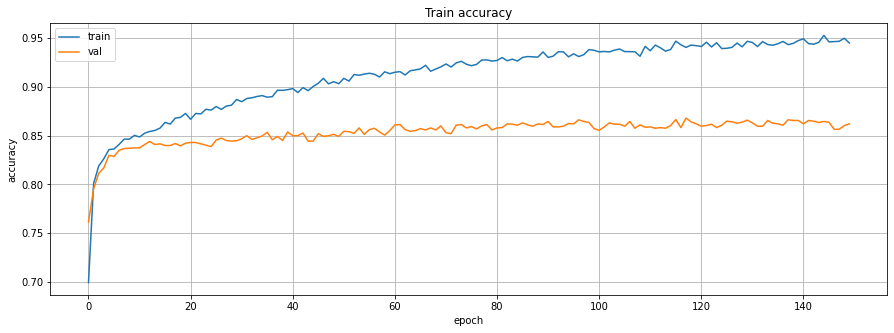

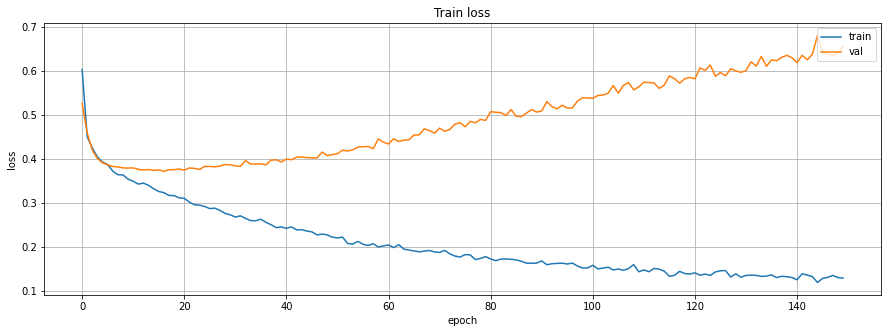

In [57]:
# Summarize history for accuracy
plt.figure(figsize=(15,5))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.grid()
plt.show()

# Summarize history for loss
plt.figure(figsize=(15,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.grid()
plt.show()

## 5.6) Deep learning softmax optimizer

###5.6.1) Adamax

In [60]:
model = tf.keras.models.Sequential()

input_dim = x_train.shape[1]    
output_dim = 2

# Input layer
model.add( tf.keras.Input(shape=(input_dim,)) )

# Hidden layer
model.add( tf.keras.layers.Dense(32, activation='relu', name='hidden1') )   # use default weight initialization, don't use any regularization
model.add( tf.keras.layers.BatchNormalization(axis=-1, name='bn1') )  
model.add( tf.keras.layers.Dense(64, activation='relu', name='hidden2') )   # use default weight initialization, don't use any regularization
model.add( tf.keras.layers.BatchNormalization(axis=-1, name='bn2') )
model.add( tf.keras.layers.Dense(32, activation='relu', name='hidden3') )   # use default weight initialization, don't use any regularization
model.add( tf.keras.layers.Dropout(0.3) )                        # drop rate = 30%

# Output layer
model.add( tf.keras.layers.Dense(output_dim, activation='softmax', name='output') )

model.summary()

#create function to calculate f1
from keras import backend as K

# Compile with default values for both optimizer and loss
model.compile( optimizer='Adamax', loss='sparse_categorical_crossentropy', metrics=['acc'] )
# Compile + hyperparameter tuning
model.compile( optimizer=tf.keras.optimizers.Adam(learning_rate=0.001) , 
                       loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False) ,
                       metrics=['acc'] 
                     )


for i in range(3):
  checkpoint_filepath = "bestmodel_epoch{epoch:02d}_valloss{val_loss:.2f}.hdf5"
  model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint( filepath=checkpoint_filepath,
                                                                                                save_weights_only=True,
                                                                                                monitor='val_acc',
                                                                                                mode='max',
                                                                                                save_best_only=True)

  start_time = time.time()
  history = model.fit ( x_traindp, y_traindp, batch_size=128, epochs=150, verbose=1, validation_split=0.3, callbacks=[model_checkpoint_callback] )
  end_time = time.time()

  y_pred = model.predict( x_testdp)
  s=accuracy_score(y_test,np.argmax(y_pred,axis = 1)) #f1_score(y_test, np.argmax(y_pred,axis = 1), average='weighted') 
  print(s)

  result = {'model': 'DeepLearningSoftMaxAdamax', 'runtime': end_time - start_time, 'Acc': s,'repetition' : i,'type' :'DL'}
  resultlist=resultlist.append(result, ignore_index = True)


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden1 (Dense)             (None, 32)                1088      
                                                                 
 bn1 (BatchNormalization)    (None, 32)                128       
                                                                 
 hidden2 (Dense)             (None, 64)                2112      
                                                                 
 bn2 (BatchNormalization)    (None, 64)                256       
                                                                 
 hidden3 (Dense)             (None, 32)                2080      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 output (Dense)              (None, 2)                

###5.6.2) Nadam

In [61]:
model = tf.keras.models.Sequential()

input_dim = x_train.shape[1]    
output_dim = 2

# Input layer
model.add( tf.keras.Input(shape=(input_dim,)) )

# Hidden layer
model.add( tf.keras.layers.Dense(32, activation='relu', name='hidden1') )   # use default weight initialization, don't use any regularization
model.add( tf.keras.layers.BatchNormalization(axis=-1, name='bn1') )  
model.add( tf.keras.layers.Dense(64, activation='relu', name='hidden2') )   # use default weight initialization, don't use any regularization
model.add( tf.keras.layers.BatchNormalization(axis=-1, name='bn2') )
model.add( tf.keras.layers.Dense(32, activation='relu', name='hidden3') )   # use default weight initialization, don't use any regularization
model.add( tf.keras.layers.Dropout(0.3) )                        # drop rate = 30%

# Output layer
model.add( tf.keras.layers.Dense(output_dim, activation='softmax', name='output') )

model.summary()

#create function to calculate f1
from keras import backend as K

# Compile with default values for both optimizer and loss
model.compile( optimizer='Nadam', loss='sparse_categorical_crossentropy', metrics=['acc'] )
# Compile + hyperparameter tuning
model.compile( optimizer=tf.keras.optimizers.Adam(learning_rate=0.001) , 
                       loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False) ,
                       metrics=['acc'] 
                     )


for i in range(3):
  checkpoint_filepath = "bestmodel_epoch{epoch:02d}_valloss{val_loss:.2f}.hdf5"
  model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint( filepath=checkpoint_filepath,
                                                                                                save_weights_only=True,
                                                                                                monitor='val_acc',
                                                                                                mode='max',
                                                                                                save_best_only=True)

  start_time = time.time()
  history = model.fit ( x_traindp, y_traindp, batch_size=128, epochs=150, verbose=1, validation_split=0.3, callbacks=[model_checkpoint_callback] )
  end_time = time.time()

  y_pred = model.predict( x_testdp)
  s=accuracy_score(y_test,np.argmax(y_pred,axis = 1)) #f1_score(y_test, np.argmax(y_pred,axis = 1), average='weighted') 
  print(s)

  result = {'model': 'DeepLearningSoftMaxNadam', 'runtime': end_time - start_time, 'Acc': s,'repetition' : i,'type' :'DL'}
  resultlist=resultlist.append(result, ignore_index = True)


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden1 (Dense)             (None, 32)                1088      
                                                                 
 bn1 (BatchNormalization)    (None, 32)                128       
                                                                 
 hidden2 (Dense)             (None, 64)                2112      
                                                                 
 bn2 (BatchNormalization)    (None, 64)                256       
                                                                 
 hidden3 (Dense)             (None, 32)                2080      
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 output (Dense)              (None, 2)                

## 5.7) Evaluate the model on test set

In [63]:
results = model.evaluate(x_test, y_test, batch_size=128)
print( f"{model.metrics_names} = {results}" )

22/22 [==============================] - 0s 3ms/step - loss: 1.0814 - acc: 0.8715
['loss', 'acc'] = [1.081392526626587, 0.8714962005615234]


## 5.8) Inference

In [64]:
# Test using the model on x_test[i]
i = 0
y_pred = model.predict( x_testdp[i].reshape(1,-1) )   # reshape x_test[i] from (n_feature,) to (1, n_feature)

print( f"{'#'*10} Input: x_testdp[{i}] {'#'*10}" )
print( f"shape={x_testdp[i].shape}\nvalue={x_testdp[i]}\n" )

print( f"{'#'*10} Ground truth: y_testdp[{i}] {'#'*10}" )
print( f"shape={y_testdp[i].shape}\nvalue={y_testdp[i]}\n" )

print( f"{'#'*10} Prediction: y_pred {'#'*10}" )
print( f"type={type(y_pred)}\ndtype={y_pred.dtype}\nshape={y_pred.shape}" )
print( f"value={y_pred}" )
print( f"np.argmax(y_pred)={np.argmax(y_pred)}" )

########## Input: x_testdp[0] ##########
shape=(33,)
value=[-1.2808589   0.33439678  0.7754779   1.1073673   0.7363932  -0.5342138
  0.779373   -0.10766101 -0.38350832 -0.5673236   1.0445795  -1.0445795
 -0.60968685 -0.66604066  1.6982462  -0.443328    0.33134556 -0.33134556
 -0.90190434  1.5084091  -0.44869217 -0.29194808 -0.8565243  -0.52434117
  1.3299328  -0.514492   -0.5457347   1.3141888  -0.4914351  -0.5753883
  0.5753883   0.22135057 -0.22135057]

########## Ground truth: y_testdp[0] ##########
shape=(1,)
value=[0.]

########## Prediction: y_pred ##########
type=<class 'numpy.ndarray'>
dtype=float32
shape=(1, 2)
value=[[0.9876779  0.01232208]]
np.argmax(y_pred)=0


# 6) Compare all ML and DL models

In [65]:
#Compare ML result after tune
print(resultlist[["model","Acc", "runtime"]].groupby("model").describe())

fig = px.scatter(resultlist, x="runtime", y="Acc", color="type",size="Acc", hover_data=['model' , 'repetition'],title='Accuracy vs Runtime for ML models',symbol = 'model')
fig.show()


fig = px.box(resultlist, x="model", y="Acc", points="all",title="Acc score for ML model",color="type")
fig.show()

fig = px.box(resultlist, x="model", y="runtime", points="all",title="Runtime for ML model",color="type")
fig.show()

                            Acc                                          \
                          count      mean       std       min       25%   
model                                                                     
AdaBoost                    3.0  0.843102  0.000000  0.843102  0.843102   
BNB                         3.0  0.798689  0.000000  0.798689  0.798689   
Bagging                     3.0  0.899648  0.003053  0.897707  0.897889   
DTC                         3.0  0.892125  0.000556  0.891518  0.891882   
DeepLearningSoftMaxAdam     1.0  0.863851       NaN  0.863851  0.863851   
DeepLearningSoftMaxAdamax   4.0  0.861849  0.001796  0.859847  0.860666   
DeepLearningSoftMaxNadam    3.0  0.868948  0.002273  0.867128  0.867674   
ETC                         3.0  0.876593  0.008373  0.868220  0.872406   
Extra Trees Ensemble        3.0  0.909234  0.001278  0.907900  0.908628   
GNB                         3.0  0.789589  0.000000  0.789589  0.789589   
Gradient Boosting        